<a href="https://colab.research.google.com/github/AbrarMahmud/EEE_447/blob/main/src/Image_Registration_1906112_me.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Import
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# List of image URLs on GitHub
image_urls = [
    #"https://raw.githubusercontent.com/AbrarMahmud/EEE_447/main/data/ref.jpg",
    "https://raw.githubusercontent.com/AbrarMahmud/EEE_447/main/data/std_1.jpeg",
    "https://raw.githubusercontent.com/AbrarMahmud/EEE_447/main/data/std_2.jpeg",
    "https://raw.githubusercontent.com/AbrarMahmud/EEE_447/main/data/std_3.jpeg"
]

# Folder where you want to save the images in Colab
#local_folder = "/content/images/"
local_folder = os.getcwd()

# Create the folder if it doesn't exist
os.makedirs(local_folder, exist_ok=True)

## For reference image.....................................................................
local_path = os.path.join(local_folder, f"ref.jpg")
    # Use wget to download the image
ref_url ="https://raw.githubusercontent.com/AbrarMahmud/EEE_447/main/data/ref.jpg"
!wget $ref_url -O $local_path
    # Check if the download was successful
if os.path.isfile(local_path):
   print(f"ref_img successfully saved to {local_path}")
else:
   print(f"Failed to retrieve ref_img.")


# Loop through for test image..............................................................
for i, image_url in enumerate(image_urls, 1):
    # Construct the local path for each image
    local_path = os.path.join(local_folder, f"img_{i}.jpeg")

    # Use wget to download the image
    !wget $image_url -O $local_path

    # Check if the download was successful
    if os.path.isfile(local_path):
        print(f"Image {i} successfully saved to {local_path}")
    else:
        print(f"Failed to retrieve image {i}.")

# List the files in the local folder
!ls $local_folder


--2023-12-26 15:08:53--  https://raw.githubusercontent.com/AbrarMahmud/EEE_447/main/data/ref.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 520591 (508K) [image/jpeg]
Saving to: ‘/content/ref.jpg’

/content/ref.jpg    100%[===================>] 508.39K  --.-KB/s    in 0.04s   

2023-12-26 15:08:53 (11.8 MB/s) - ‘/content/ref.jpg’ saved [520591/520591]

ref_img successfully saved to /content/ref.jpg
--2023-12-26 15:08:54--  https://raw.githubusercontent.com/AbrarMahmud/EEE_447/main/data/std_1.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response

## In The Above Code
In this code:

**1**  !wget is used to download the image from the specified URL.

**2**  -O is used to specify the local path where the downloaded file will be saved.

**3**  when we execute !ls $local_folder, it essentially runs the shell command ls on the specified folder, displaying the list of files in that directory. This can be helpful to verify that the images were successfully downloaded and to see the names of the files in the specified folder.

In [47]:
# Read reference image
refFilename = "ref.jpg"
print("Reading reference image:", refFilename)
im1 = cv2.imread(refFilename, cv2.IMREAD_COLOR)
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)

# Read image to be aligned##################TEST_IMAGE#########################
imFilename = "img_3.jpeg"
print("Reading image to align:", imFilename)
im2 = cv2.imread(imFilename, cv2.IMREAD_COLOR)
im2_cvt = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB) #This function is used only to convert BGR--->RGB

Reading reference image: ref.jpg
Reading image to align: img_3.jpeg


Text(0.5, 1.0, 'Scanned Form')

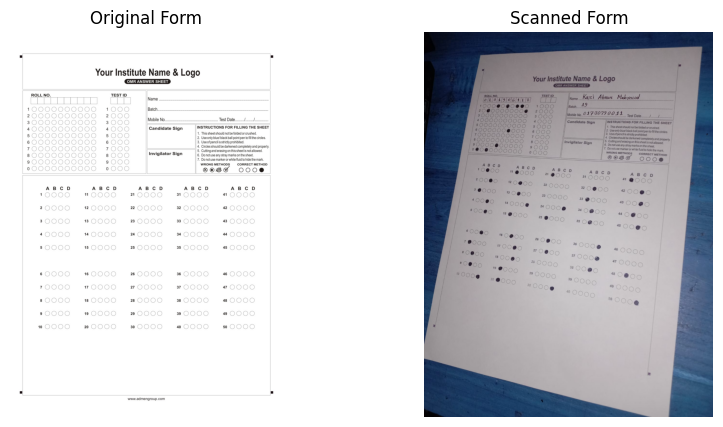

In [48]:
# Display Images

plt.figure(figsize=[10, 5]);
plt.subplot(121); plt.axis('off'); plt.imshow(im1); plt.title("Original Form")
plt.subplot(122); plt.axis('off'); plt.imshow(im2); plt.title("Scanned Form")

## Find keypoints in both Images

Think of keypoints as corner points that are stable under image transformations

In [66]:
# Convert images to grayscale
im1_gray = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
im2_gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)


# Detect ORB features and compute descriptors.
MAX_NUM_FEATURES = 1500  #####################500
orb = cv2.ORB_create(MAX_NUM_FEATURES)
keypoints1, descriptors1 = orb.detectAndCompute(im1_gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(im2_gray, None)

# Display
im1_display = cv2.drawKeypoints(im1, keypoints1, outImage=np.array([]),
                                color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

im2_display = cv2.drawKeypoints(im2, keypoints2, outImage=np.array([]),
                                color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

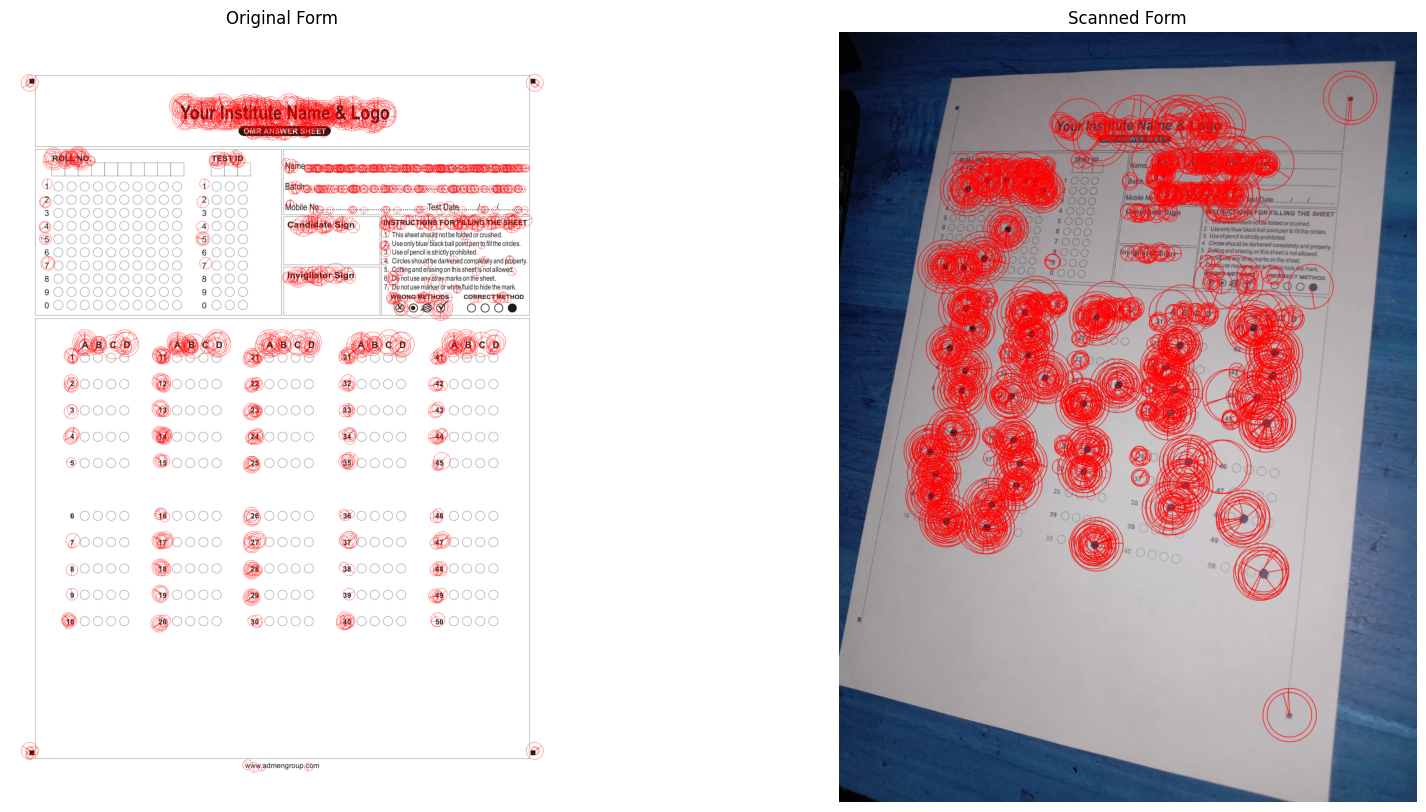

In [67]:
plt.figure(figsize=[20,10])
plt.subplot(121); plt.axis('off'); plt.imshow(im1_display); plt.title("Original Form");
plt.subplot(122); plt.axis('off'); plt.imshow(im2_display); plt.title("Scanned Form");

##  Match keypoints in the two image

In [74]:
# Match features.
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

# Converting to list for sorting as tuples are immutable objects.
matches = list(matcher.match(descriptors1, descriptors2, None))

# Sort matches by score
matches.sort(key=lambda x: x.distance, reverse=False)

# Remove not so good matches
numGoodMatches = int(len(matches) * 0.01)
matches = matches[:numGoodMatches]

Text(0.5, 1.0, 'Original Form')

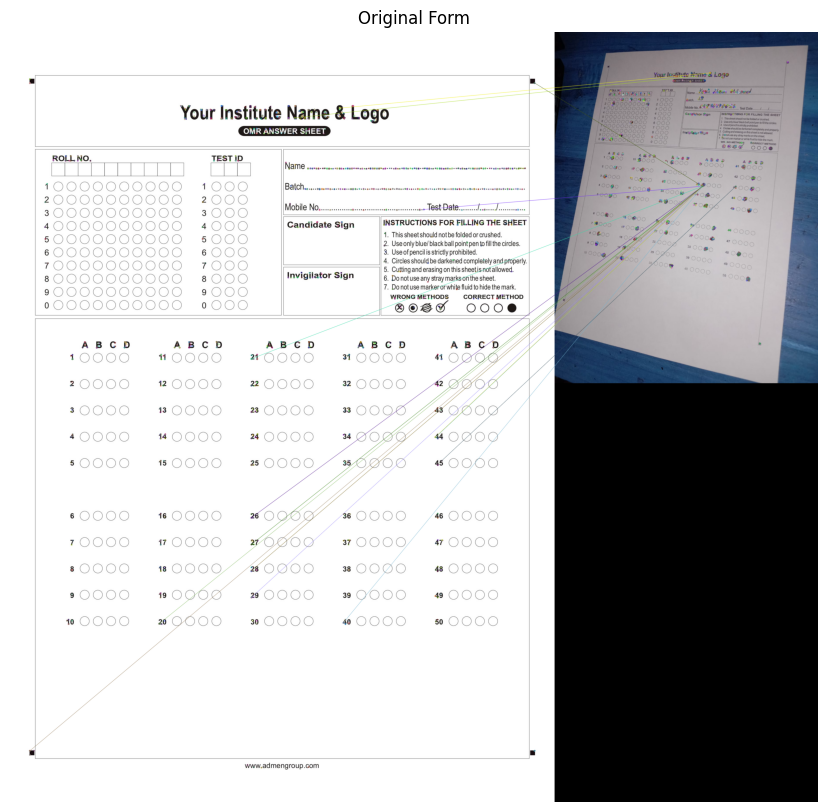

In [75]:
# Draw top matches
im_matches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)

plt.figure(figsize=[40, 10])
plt.imshow(im_matches);plt.axis("off");plt.title("Original Form")

##  Find Homography



In [76]:
# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

# Find homography
h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

## Warp image

Text(0.5, 1.0, 'Scanned Form')

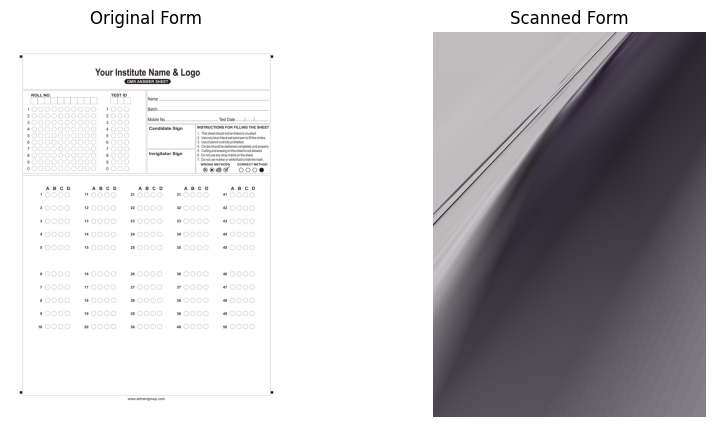

In [77]:
# Use homography to warp image
height, width, channels = im1.shape
im2_reg = cv2.warpPerspective(im2, h, (width, height))

# Display results
plt.figure(figsize=[10, 5])
plt.subplot(121);plt.imshow(im1);    plt.axis("off");plt.title("Original Form")
plt.subplot(122);plt.imshow(im2_reg);plt.axis("off");plt.title("Scanned Form")